This homework is the second part of the homework serie using the .csv which summarizes the contributions received by a selective private liberal arts college in the Midwest. The college has a large endowment and, as all private colleges do, keeps detailed records on alumni donations. Here we analyze the contributions of ﬁve graduating classes (the cohorts who have graduated in 1957, 1967, 1977, 1987, and 1997). The data set consists of n = 1230 living alumni and contains their contributions for the years 2000 – 2004.

This time, we will try to draw descriptive statistics regarding the dataset.

In [1]:
#Data
Beethoven <- read.csv("homework.csv", header=TRUE, sep=",")

In [2]:
head(Beethoven)

Gender,Class.Year,Marital.Status,Major,Next.Degree,FY04Giving,FY03Giving,FY02Giving,FY01Giving,FY00Giving,AttendenceEvent
M,1957,M,History,LLB,2500,2500,1400,12060,12000,1
M,1957,M,Physics,MS,5000,5000,5000,5000,10000,1
F,1957,M,Music,NONE,5000,5000,5000,5000,10000,1
M,1957,M,History,NONE,0,5100,200,200,0,1
M,1957,M,Biology,MD,1000,1000,1000,1005,1000,1
F,1957,M,Mathematics,NONE,0,0,0,0,0,0


The above functions give us a quick reminder regarding the composition of our dataframe. We need to define variables which may simplify our task.

In [3]:
#Year
Year <- Beethoven$Class.Year
unique(Year)
cat(paste('We have ', nlevels(factor(Year)), ' unique years.'))

[1] 1957 1967 1977 1987 1997

We have  5  unique years.

We are looking for the total contribution of each graduate for FY00, FY01, ... , FY04. To do so we need to some each FY column for each row. It gives us the following :

In [4]:
#All money
Beethoven$StudentContribution <- rowSums(Beethoven[,c("FY00Giving","FY01Giving","FY02Giving","FY03Giving","FY04Giving")])
summary(Beethoven$StudentContribution)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0      75     980     400  171870 

Our extreme values are <b>0:171870</b>, with a median value positioned at <b>75</b>, our mean is <b>980</b>. Our quantile are the following : 1st(0), 3rd(400).

Now we want the mean for each graduate contribution.

In [5]:
#Average Contribution By Student

Beethoven$Mean <- rowMeans (Beethoven[,c("FY00Giving","FY01Giving","FY02Giving","FY03Giving","FY04Giving")])
summary(Beethoven$Mean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0      15     196      80   34374 

For mean, we have our lowest mean at <b>0</b> and our max mean at <b>34374</b>.

Now we want the standard deviation for each graduate contribution.

In [6]:
#Standard Deviation By Student

Beethoven$SD <- apply(Beethoven[,6:10],1,sd)
summary(Beethoven$SD)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     0.00    11.18   178.73    44.72 71025.85 

For standard deviation, we have our lowest SD at <b>0</b> and our max SD at <b>71025.85</b>.

As for percentiles, we have the following :

In [7]:
#Quantiles -> tried quantile$Beethoven <- apply(Beethoven[,6:10], 1, quantile, probs=c(.25), na.rm=TRUE) did not work

QuantileStudentContribution <- quantile(Beethoven$StudentContribution)
print(QuantileStudentContribution)

      0%      25%      50%      75%     100% 
     0.0      0.0     75.0    400.0 171870.1 


0% = <b>0</b>, 25% = <b>0</b>, 50% = <b>75.0</b>, 50% = <b>75.0</b>, 75% = <b>400.0</b>, 100% = <b>171870.1</b>

In [8]:
summary(QuantileStudentContribution)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0      75   34469     400  171870 

Since I was not sure regarding the instructions, I did the graphs for both each graduate YEAR and each graduate

In [9]:
#All Years Contribution
fclass <- Beethoven[ which(Year=="1957"),]
sclass <- Beethoven[ which(Year=="1967"),]
tclass <- Beethoven [ which(Year=="1977"),]
fthclass <- Beethoven [ which(Year=="1987"),]
ffclass <- Beethoven[ which(Year=="1997"),]
fclassm <- sum(fclass$FY00Giving, fclass$FY01Giving, fclass$FY02Giving, fclass$FY03Giving, fclass$FY04Giving)
sclassm <- sum(sclass$FY00Giving, sclass$FY01Giving, sclass$FY02Giving, sclass$FY03Giving, sclass$FY04Giving)
tclassm <- sum(tclass$FY00Giving, tclass$FY01Giving, tclass$FY02Giving, tclass$FY03Giving, tclass$FY04Giving)
fthclassm <- sum(fthclass$FY00Giving, fthclass$FY01Giving, fthclass$FY02Giving, fthclass$FY03Giving, fthclass$FY04Giving)
ffclassm <- sum(ffclass$FY00Giving, ffclass$FY01Giving, ffclass$FY02Giving, ffclass$FY03Giving, ffclass$FY04Giving)

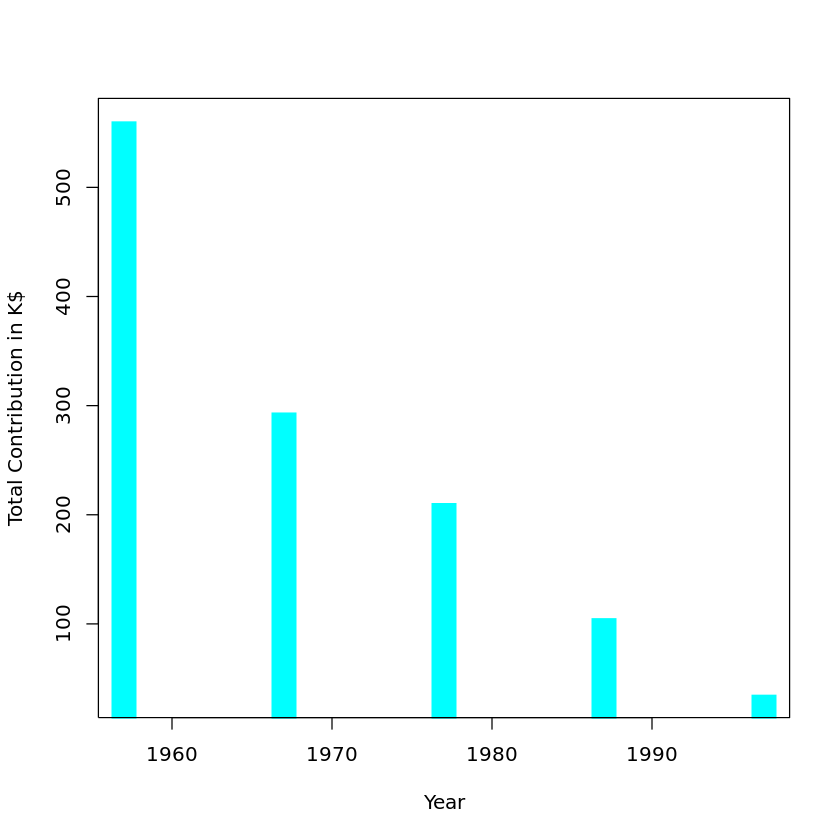

In [10]:
#Graph plot
AllMoney <- c(fclassm, sclassm, tclassm, fthclassm, ffclassm)
plot(y = AllMoney/1000, x=c('1957', '1967', '1977', '1987', '1997'),  col = "cyan", xlab= "Year", ylab = 'Total Contribution in K$',type = "h", lwd = 20, lend=1)

(Already commented in the homework 1) - We can see in the above graph that the oldest classes gave us a largest amount of money compared to the more recent one. It makes sense since they would work for longer and have more opportunities to donate money.

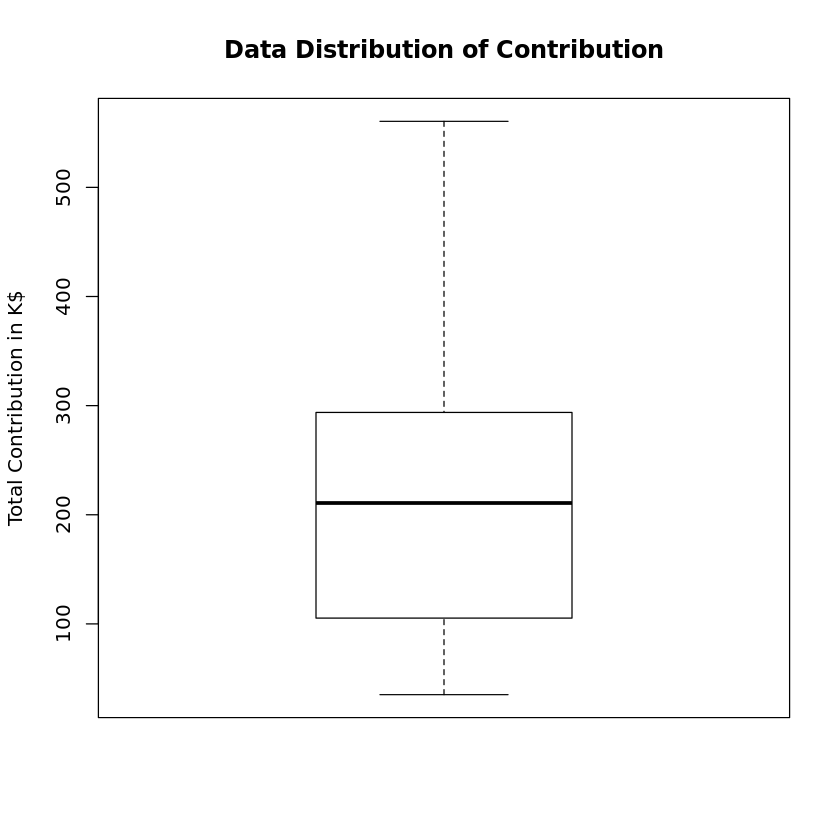

In [11]:
boxplot(AllMoney/1000, outline=T, horizontal=F, main="Data Distribution of Contribution", ylab="Total Contribution in K$")

In the above graph, we can see there are no outliers (more/less times higher/lower than 3/2 quantile). We can also see that the minimum is <b>below 100k</b>, the lower quartile is near <b>100k</b>, the median value is near <b>200k</b>, the upper quartile is near <b>300k</b>. Finally the maximum is above <b>500k</b>.

This implies for the company that most contributions of 200kish$ are the norm.

Now we are analyzing the data for each student contribution :

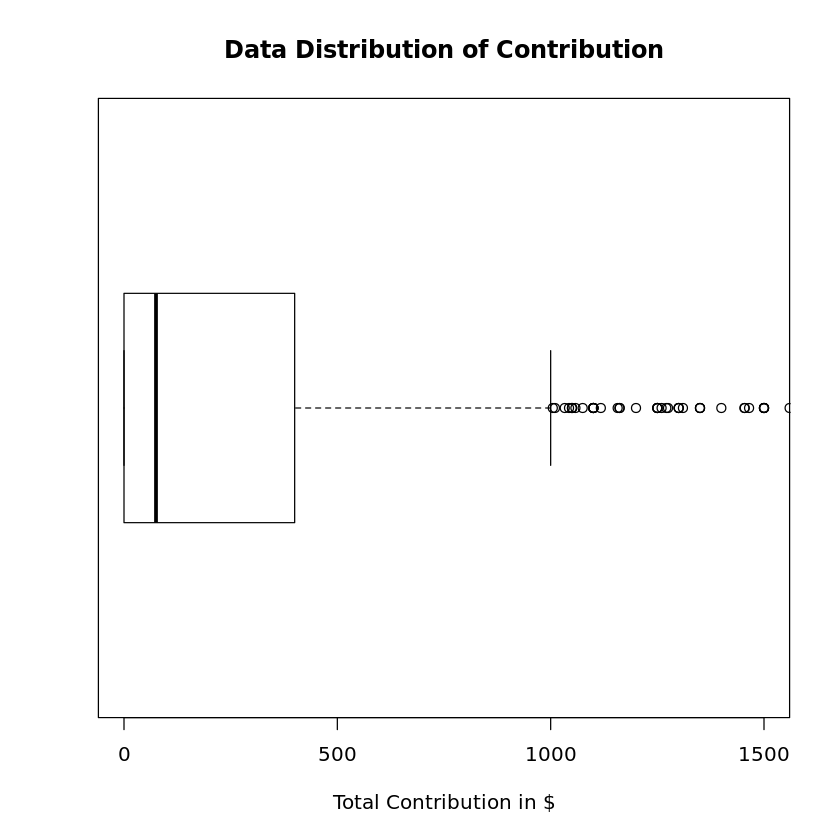

In [12]:
boxplot(Beethoven$StudentContribution, outline=T, horizontal=T, main="Data Distribution of Contribution", ylim = c(0, 1500), xlab = "Total Contribution in $")

In the above graph, we can see there are (more/less times higher/lower than 3/2 quantile). We can also see that the minimum is <b>0</b>, the lower quartile is <b>0</b>, the median value is near <b>100</b>, the upper quartile is near <b>400</b>. Finally the maximum excluding outliers is above <b>1000</b>.

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”

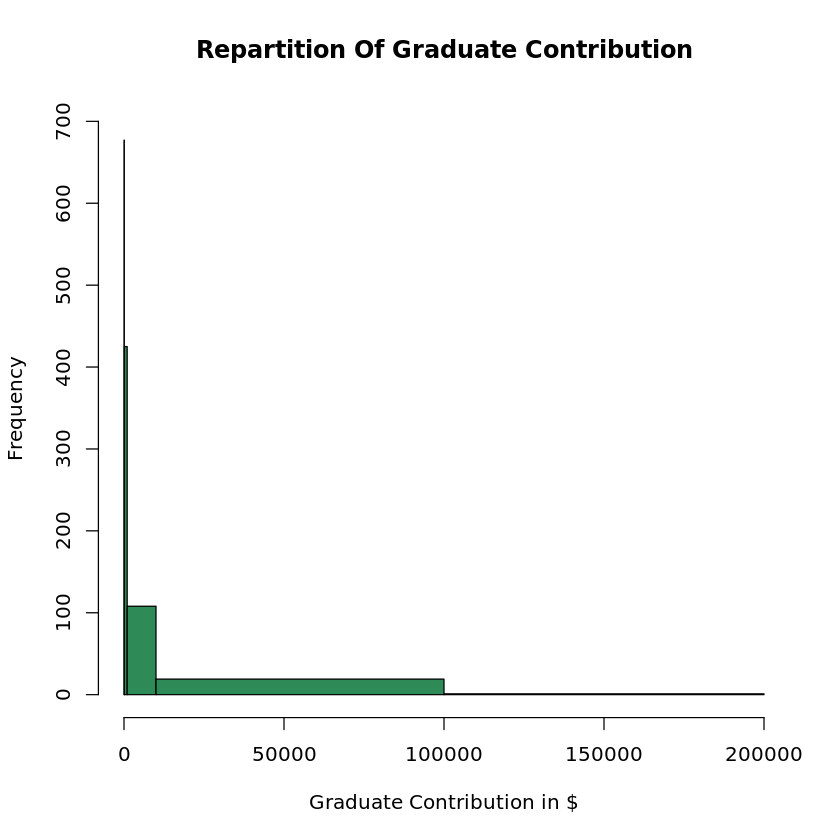

In [13]:
hist(Beethoven$StudentContribution, freq=TRUE, breaks=c(0,100,1000,10000,100000,200000), ylim=c(0, 700), col="seagreen4", main="Repartition Of Graduate Contribution", xlab="Graduate Contribution in $")

The frequency histogram shows us that lot of people do not donate anything, and most people donating, donate less than 50000 dollars, people donating above 50k dollars have a total frequency < 50 

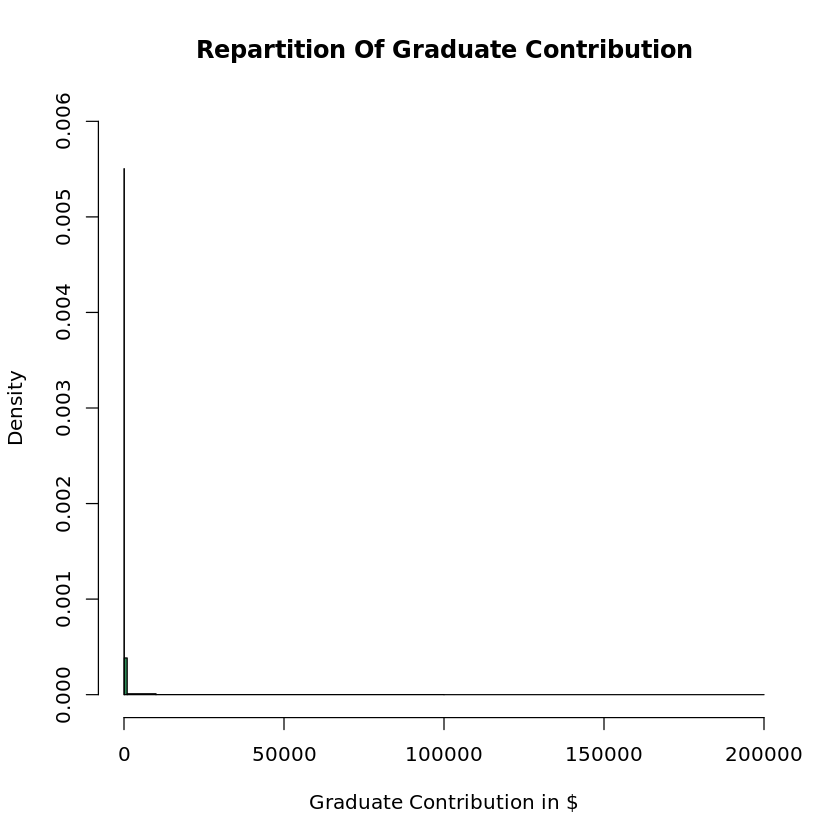

In [14]:
hist(Beethoven$StudentContribution, freq=F, ylim=c(0, 0.006),main="Repartition Of Graduate Contribution", xlab="Graduate Contribution in $", col="seagreen4", breaks=c(0,100,1000,10000,100000,200000))

The density hist confirms what we just wrote above and highly emphasizes it.

From all of this, we can confidently say that for individual donation, for 2000-2004, most people do not donate at all or a small amount. The range between minimum and maximum are extremes with [0:170000] rounded. The median being at <b>75</b> for people donation vs a mean of <b>980</b> shows that this extreme discrepancy in our data affects the statistics. The individual mean in "mean" and "standard deviation" shows us that for most people their donation overtime (FY00,(...),FY04) does not change very much.

The following code just list what we saw in class last time :

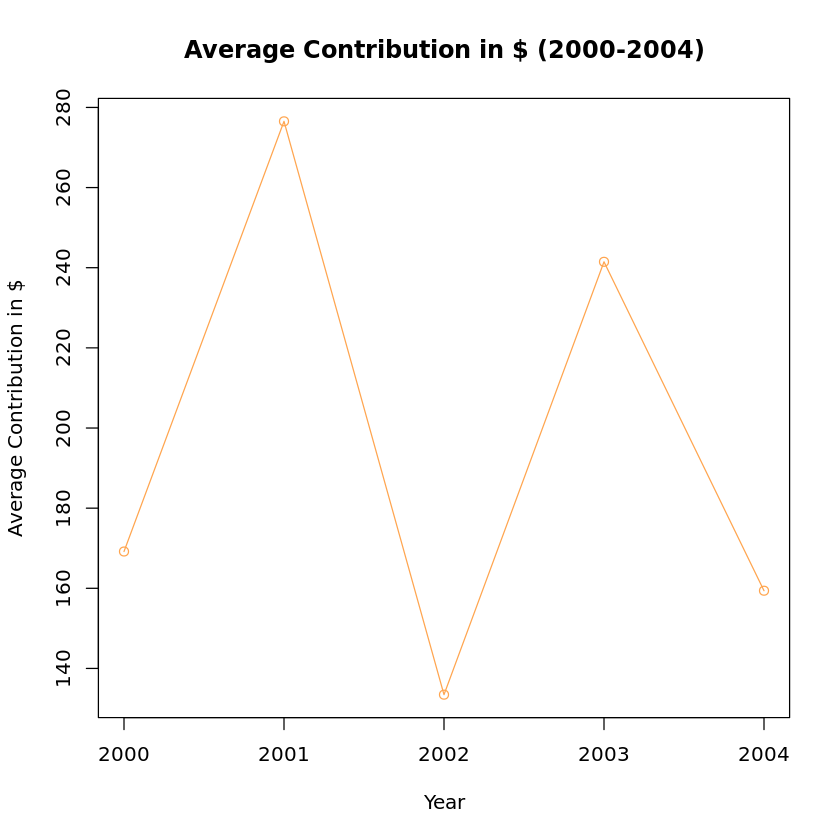

In [15]:
#Average Contribution Per FY
FY00Mean <- mean(Beethoven[,"FY00Giving"])
FY01Mean <- mean(Beethoven[,"FY01Giving"])
FY02Mean <- mean(Beethoven[,"FY02Giving"])
FY03Mean <- mean(Beethoven[,"FY03Giving"])
FY04Mean <- mean(Beethoven[,"FY04Giving"])
meanperFY <- c(FY00Mean,FY01Mean,FY02Mean,FY03Mean,FY04Mean)
plot(y=meanperFY, x=c(2000,2001,2002,2003,2004), type="o", col="tan1", xlab="Year", ylab="Average Contribution in $", main="Average Contribution in $ (2000-2004)")

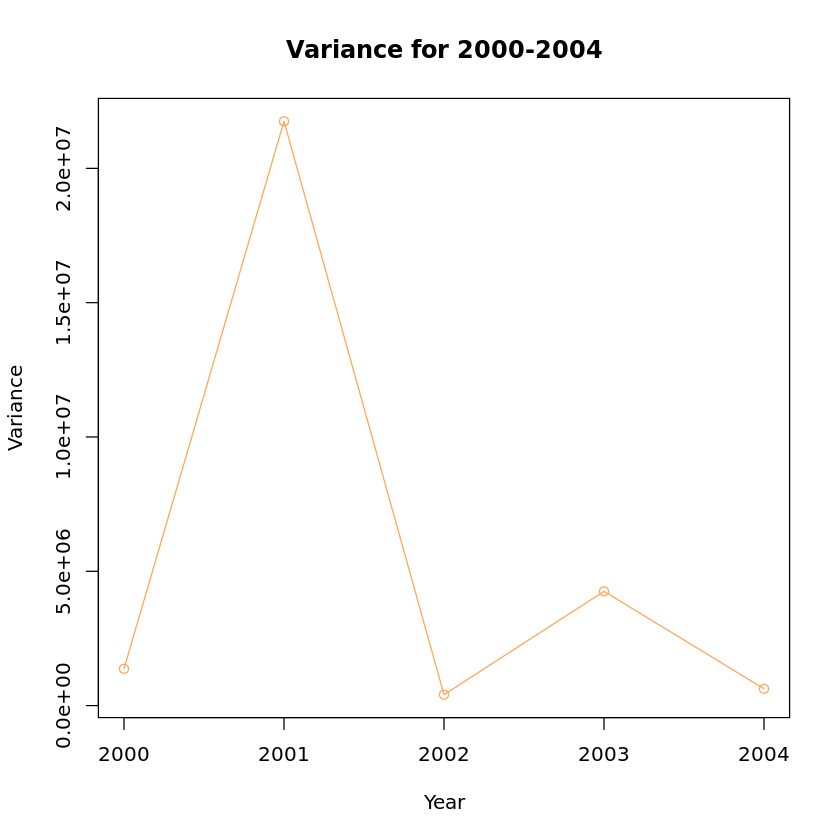

In [16]:
#Variance per FY
FY00Var <- var(Beethoven[,"FY00Giving"])
FY01Var <- var(Beethoven[,"FY01Giving"])
FY02Var <- var(Beethoven[,"FY02Giving"])
FY03Var <- var(Beethoven[,"FY03Giving"])
FY04Var <- var(Beethoven[,"FY04Giving"])
varperFY <- c(FY00Var,FY01Var,FY02Var,FY03Var,FY04Var)
plot(y=varperFY, x=c(2000,2001,2002,2003,2004), type="o", col="tan1", xlab="Year", ylab="Variance", main="Variance for 2000-2004")

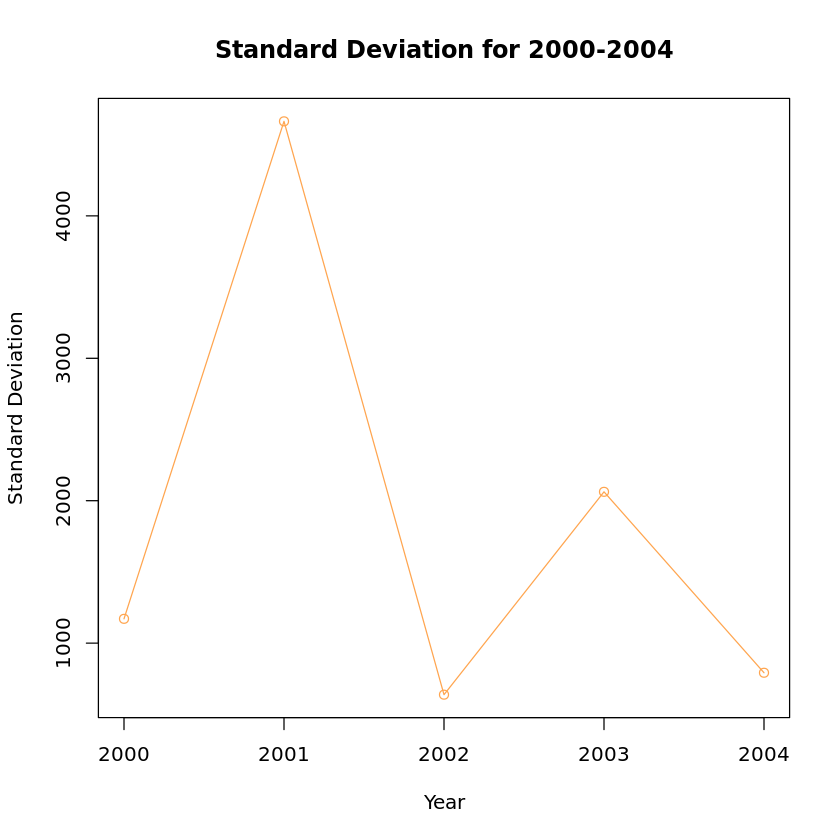

In [17]:
FY00sd <- sd(Beethoven[,"FY00Giving"])
FY01sd <- sd(Beethoven[,"FY01Giving"])
FY02sd <- sd(Beethoven[,"FY02Giving"])
FY03sd <- sd(Beethoven[,"FY03Giving"])
FY04sd <- sd(Beethoven[,"FY04Giving"])
sdFY <- c(FY00sd,FY01sd,FY02sd,FY03sd,FY04sd)
plot(y=sdFY, x=c(2000,2001,2002,2003,2004), type="o", col="tan1", xlab="Year", ylab="Standard Deviation", main="Standard Deviation for 2000-2004")

In [18]:
#Cov test
cv=sdFY/meanperFY
print(cv)

[1]  6.919408 16.865164  4.781466  8.540824  4.968872
